In [ ]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
import tensorflow as tf

In [ ]:
def VGGupdated(input_tensor=None,classes=5):

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [ ]:
model = VGGupdated(classes = 5)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/'

types = os.listdir('/content/drive/MyDrive/Final year project 22-23/augmented_dataset')
types.remove('output')
print(types)  #what kinds of rooms are in this dataset

print("Types of faults found: ", len(types))

['single_thermal', 'multi_thermal', 'dust_thermal', 'diode_thermal', 'pid_thermal']
Types of faults found:  5


In [ ]:
faults = []

for item in types:
 # Get all the file names
 all_types = os.listdir(dataset_path+item)

 # Add them to the list
 for fault in all_types:
  faults.append((item, dataset_path + item + '/' + fault))

In [ ]:
print(len(faults))

1585


In [ ]:
df = pd.DataFrame(data=faults, columns=['type', 'image'])
print(df.head())

             type                                              image
0  single_thermal  /content/drive/MyDrive/Final year project 22-2...
1  single_thermal  /content/drive/MyDrive/Final year project 22-2...
2  single_thermal  /content/drive/MyDrive/Final year project 22-2...
3  single_thermal  /content/drive/MyDrive/Final year project 22-2...
4  single_thermal  /content/drive/MyDrive/Final year project 22-2...


In [ ]:
print("Total number of faults in the dataset: ", len(df))

count = df['type'].value_counts()

print("Faults in each category: ")
print(count)

Total number of faults in the dataset:  1585
Faults in each category: 
single_thermal    500
pid_thermal       350
multi_thermal     299
diode_thermal     280
dust_thermal      156
Name: type, dtype: int64


In [ ]:
import cv2

im_size = 300

images = []
labels = []

for _,i in df.iterrows():
  img = cv2.imread(i['image'])
  img = cv2.resize(img, (im_size, im_size))
  images.append(img)
  labels.append(i['type'])

# for i in types:
#     data_path = dataset_path + i
#     filenames = [x for x in os.listdir(data_path) ]

#     for f in filenames:
#         img = cv2.imread(data_path + '/' + f)
#         img = cv2.resize(img, (im_size, im_size))
#         images.append(img)
#         labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1585, 300, 300, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['type'].values

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)

In [ ]:
# y=y.reshape(-1,1)
# onehotencoder = OneHotEncoder(categorical_features=[4])
# Y= onehotencoder.fit_transform(y)
# Y.shape
y=y.reshape(-1,1)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
Y.shape

(1585, 5)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.25, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1188, 300, 300, 3)
(1188, 5)
(397, 300, 300, 3)
(397, 5)


In [ ]:
train_y_dense = tf.sparse.to_dense(train_y)
model.fit(train_x, train_y_dense, epochs = 100, batch_size = 32)

TypeError: ignored

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
path='/content/drive/MyDrive/Final year project 22-23/augmented_dataset/'
for i in os.listdir(path):
  if i=='output':
    continue
  for x in os.listdir(path+i):


NEW TYPE OF VGG16

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32
TRAINING_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/output/train'
VALIDATION_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/output/val'
TEST_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/output/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   fill_mode = 'nearest')

train_x = train_datagen.flow_from_directory(TRAINING_DIR,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)

val_x = val_datagen.flow_from_directory(VALIDATION_DIR,
                                         target_size = IMAGE_SIZE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_x = test_datagen.flow_from_directory(TEST_DIR,
                                           target_size = IMAGE_SIZE,
                                           batch_size = BATCH_SIZE,
                                           class_mode = 'categorical')


Found 1267 images belonging to 5 classes.
Found 157 images belonging to 5 classes.
Found 161 images belonging to 5 classes.


In [ ]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3],
            weights = 'imagenet',
            include_top = False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)
prediction = Dense(5, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.01),
              metrics = ['accuracy'])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=40,restore_best_weights=True)
history=model.fit(train_x, validation_data=val_x, epochs = 100, batch_size = 32, callbacks=[early_stopping_cb])

Epoch 1/100
40/40 [==============================] - 24s 561ms/step - loss: 27.0171 - accuracy: 0.3244 - val_loss: 2.5141 - val_accuracy: 0.3758
Epoch 2/100
40/40 [==============================] - 25s 617ms/step - loss: 1.8630 - accuracy: 0.4049 - val_loss: 5.7888 - val_accuracy: 0.3185
Epoch 3/100
40/40 [==============================] - 22s 560ms/step - loss: 1.6074 - accuracy: 0.4459 - val_loss: 1.2250 - val_accuracy: 0.4904
Epoch 4/100
40/40 [==============================] - 21s 524ms/step - loss: 1.2659 - accuracy: 0.4767 - val_loss: 1.4690 - val_accuracy: 0.3949
Epoch 5/100
40/40 [==============================] - 21s 535ms/step - loss: 1.5588 - accuracy: 0.4688 - val_loss: 1.2244 - val_accuracy: 0.5223
Epoch 6/100
40/40 [==============================] - 22s 553ms/step - loss: 1.2168 - accuracy: 0.4720 - val_loss: 1.2058 - val_accuracy: 0.4968
Epoch 7/100
40/40 [==============================] - 23s 575ms/step - loss: 1.8914 - accuracy: 0.4957 - val_loss: 1.1725 - val_accuracy

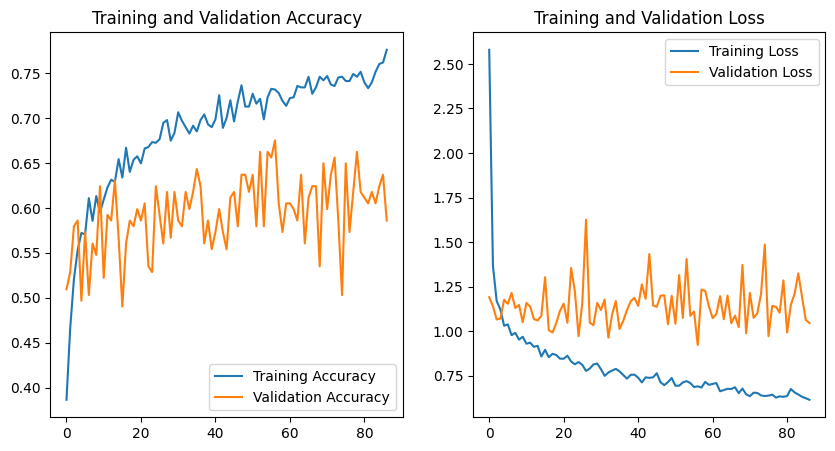

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = len(history.epoch)
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
baseline_results = model.evaluate(test_x, batch_size=32, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print('Test', name, ': ', value)
print()

Test loss :  0.7930875420570374
Test accuracy :  0.695652186870575



In [ ]:
pred=[]
true=[]
for i in range(len(test_x)):
    testData, testLabels = test_x.next()
    test_labels = np.stack(([testLabels[i] for i in range(len(testLabels))]))
    test_images = np.stack(([testData[i] for i in range(len(testLabels))]))
    predicted = model.predict(test_images)
    true+=list(np.argmax(test_labels,axis=1))
    pred+=list(np.argmax(predicted, axis=1))

1/1 [==============================] - 0s 138ms/step


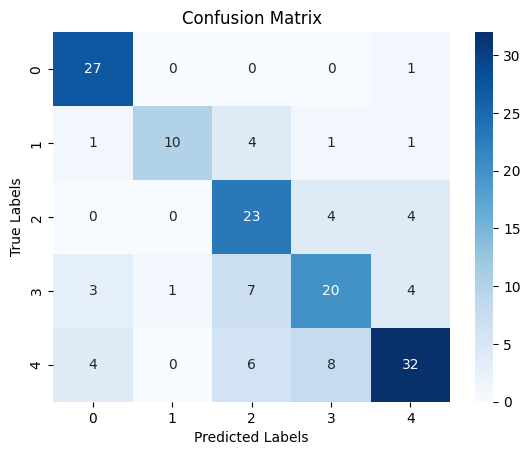

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(true, pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()